<a href="https://colab.research.google.com/github/Alymostafa/GPA_Prediction/blob/master/Copy_of_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.ma as ma
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

In [0]:
data=pd.read_csv('DATA1.csv')

## <h1>Display all Data </h1>

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

In [6]:
data.head()

,GPA :,Per_min_OnRoad,Per_hours_At_College,Per_days_attendance
0,2.04,240,4.0,4.0
1,3.22,120,7.0,5.0
2,2.92,30,4.0,5.0
3,3.50,60,5.0,4.0
4,2.86,140,4.0,4.0


## **<h1> Assign Features and Labels </h1>**



In [0]:

#data1=data1.drop('GPA :', axis=1) Without Label

In [0]:
 X=np.array(data)
x_1 = data[['Per_min_OnRoad','Per_hours_At_College','Per_days_attendance']]
x_1.head()
X_1 = np.array(x_1)
y_1 = data[['GPA :']]
y_1.head()
Y_1 = np.array(y_1)


## Visualize Data

Text(0.5, 1.0, 'GPA Vs Per_min_OnRoad')

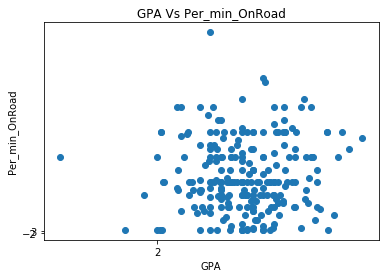

In [112]:
plt.scatter(data['GPA :'],data['Per_min_OnRoad'])
plt.xticks(np.arange(2,5,step=5))
plt.yticks(np.arange(-2,5,step=5))
plt.xlabel("GPA")
plt.ylabel("Per_min_OnRoad")
plt.title("GPA Vs Per_min_OnRoad")

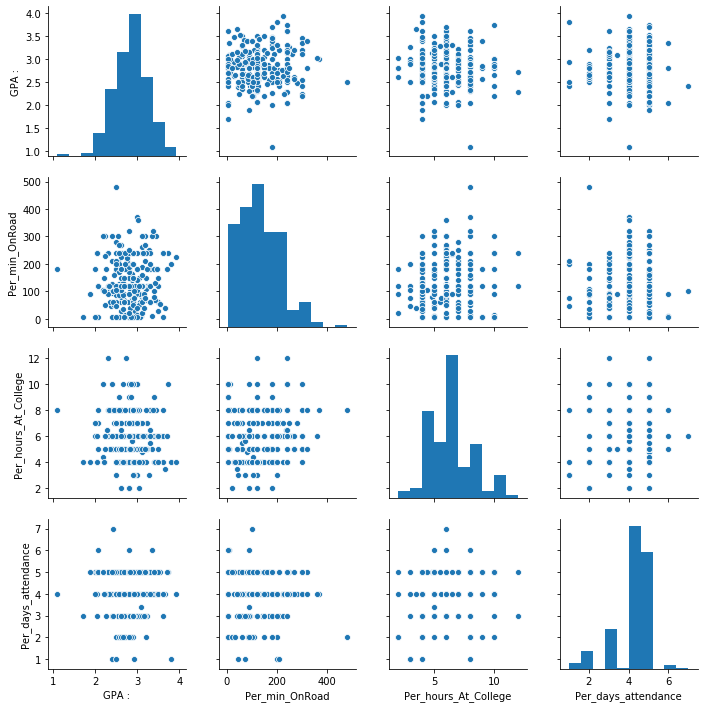

In [10]:
sns.pairplot(data)


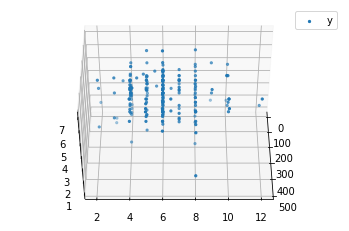

In [114]:
fig = plt.figure() 
ax = fig.gca(projection ='3d') 

ax.scatter(X_1[:, 0], X_1[:, 1],X_1[:,2], label ='y', s =5) 
ax.legend() 
ax.view_init(45, 0) 

plt.show()

### <h2>Covariance Matrix and Mean And Generate New Data


In [0]:
cov=np.cov(X,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X,axis=0)

<p color='blue'> Generating New Data from Old Distribution Data </p>

In [12]:
Size_of_Data=243
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
New_Data.shape

(243, 4)

##<h3 color='red'> Ploting Old Data and New Data</h3>

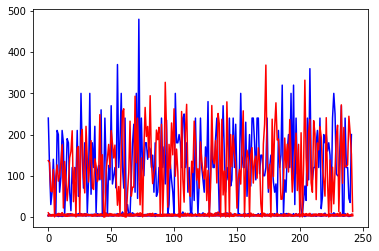

In [13]:
New_Data[New_Data < 0] = 0
plt.plot(X,color='blue')
plt.plot(New_Data,color='r')
plt.show()

## <h1> This Function Delete rows whose Values =0</h1>

In [0]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)


In [0]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][3]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)



In [0]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][2]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)



In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][1]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)


## <h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

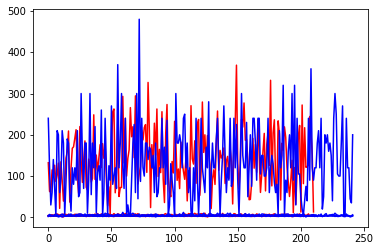

In [18]:
# The New Data Represented by red Color 
plt.plot(Final_Data,color='r')
plt.plot(data,color='blue')
plt.show()

##<h1>The Percentage of data After Cleaning</h1>

In [19]:
Size_After_cleaning=Final_Data.shape[0]
def Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning):
   result=((Size_of_Data-Size_After_cleaning)/Size_of_Data)*100
   print(result)
Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning)

13.168724279835391


##<h1>KNN For Testing Distance between two classes</h1>

In [0]:
ones=np.ones(242)


In [21]:
Final_Data.shape

(211, 4)

In [0]:
zeros=np.zeros(222)
# column_to_be_added_zeros = np.array(zeros)
# class_zeros = np.column_stack((X, column_to_be_added_zeros))
# class_zeros

In [23]:
Merge_data=np.concatenate((X, Final_Data), axis=0)
Y_label=np.concatenate((ones,zeros),axis=0)
Y_label.shape

(464,)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Y_label, test_size=0.2) # change test_size and no of features

ValueError: ignored

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [0]:
from sklearn import metrics

y_pred = classifier.predict(X_test)
print(metrics.accuracy_score( y_pred,y_test))

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test))

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [0]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(X_1, Y_1, test_size = 0.05, random_state=9)


In [0]:
lin_reg_mod = LinearRegression()


In [0]:
lin_reg_mod.fit(Xreg_train, yreg_train)


In [0]:
pred = lin_reg_mod.predict(Xreg_test)


##**GPA Category and Casting to Integer**







In [0]:
def gpa_cat(data):
  data = np.where((data >= 2.0 ) & (data < 2.4),-2,data) #pass
  data = np.where((data < 2.0) & (data >= 1.0),-1,data) #fail
  data = np.where(data>=3.4,0,data)#excellent
  data = np.where((data >= 2.8) & (data < 3.4),1,data)#very good
  data = np.where((data >= 2.4) & (data < 2.8),2,data)#good
  data_1 = data.astype(int)
  return data_1



In [133]:
print(gpa_cat(Y_1))

[[-2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [-2]
 [ 0]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [-2]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [-2]
 [ 2]
 [-1]
 [ 2]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 1]
 [-2]
 [ 1]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [-2]
 [ 2]
 [ 1]
 [ 0]
 [-2]
 [ 2]
 [ 1]
 [ 1